## General Workflow

### 4) Model Development & Evaluation
### 5) Model Interpretability

In [56]:
# Import Packages

import pandas as pd
import numpy as np
import datetime
import os

import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


import seaborn as sns


#Logistic Regression
from sklearn.linear_model import LogisticRegression


# regularized regression with Ridge absolute value alpha
from sklearn.linear_model import Lasso


#for confusion matrix
from sklearn.metrics import confusion_matrix
#for having clasification reports
from sklearn.metrics import classification_report
#ROC curve for analyzing Logistic regression
from sklearn.metrics import roc_curve
# Cross Validation Score
from sklearn.model_selection import cross_val_score
# Calculate AUC Score
from sklearn.metrics import roc_auc_score

#an algotithm to normalize the numbers by dividing them to thairs std
from scipy.cluster.vq import whiten

from sklearn.metrics import r2_score, accuracy_score
from scipy.stats import spearmanr, pearsonr

from sklearn.ensemble import RandomForestClassifier

In [10]:
# Change to working dir
os.chdir("Data")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Data'

In [327]:
# Read Data

base6169=pd.read_csv("gift_base_6169.csv", index_col = 0)

base7244=pd.read_csv("gift_base_7244.csv", index_col = 0)

base7362=pd.read_csv("gift_base_7362.csv", index_col = 0)

## Data Prep before ML

In [328]:
# Impute missing values

# impute missing region as 3, 3 corresponds to 'Missing' in the original Data
base6169['region'] = base6169['region'].fillna(3)
# Keep the information on missing region
base6169['missing_region'] = base6169['region'].apply(lambda row: 1 if row == 3 else 0)


# impute missing province as 9, 9 corresponds to 'Missing' in the original Data
base6169['province'] = base6169['province'].fillna(9)
# Keep the information on missing province
base6169['missing_province'] = base6169['province'].apply(lambda row: 1 if row == 9 else 0)

# impute missing zipcode as 0
base6169['zipcode'] = base6169['zipcode'].fillna(0)
# Keep the information on missing zipcode
base6169['missing_zipcode'] = base6169['zipcode'].apply(lambda row: 1 if row == 0 else 0)

# Keep the information on missing gender
base6169['missing_gender'] = base6169['gender'].apply(lambda row: 1 if row == 'NaN' else 0)
# impute missing gender as Female
base6169['gender'] = base6169['gender'].fillna(1)

# Keep the information on missing language
base6169['missing_language'] = base6169['language'].apply(lambda row: 1 if row == 'NaN' else 0)
# impute missing language as NL
base6169['language'] = base6169['language'].fillna(3)

# Keep the information on missing Age
base6169['missing_Age'] = base6169['Age'].apply(lambda row: 1 if row == 'NaN' else 0)
# impute missing age with median
base6169['Age'] = base6169['Age'].fillna(base6169['Age'].median())


# Data Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_stddz = ['frequency_donor', 'total_donated', 'Recency_dono', 'Age']

base6169[cols_to_stddz] = scaler.fit_transform(base6169[cols_to_stddz])

base6169

,donorID,frequency_donor,total_donated,Recency_dono,zipcode,province,region,gender,language,donated_more_than30_duringdv,Age,missing_region,missing_province,missing_zipcode,missing_gender,missing_language,missing_Age
0,100001,-0.030608,1.206659e-15,2.796567e-15,1861.0,4.0,2.0,1.0,3.0,0,0.091396,0,0,0,0,0,0
1,100002,-0.030608,1.206659e-15,2.796567e-15,2260.0,1.0,2.0,0.0,3.0,0,1.097827,0,0,0,0,0,0
2,100004,-0.030608,1.206659e-15,2.796567e-15,1020.0,2.0,1.0,1.0,2.0,0,1.097827,0,0,0,0,0,0
3,100008,-0.030608,1.206659e-15,2.796567e-15,1780.0,4.0,2.0,0.0,2.0,0,2.041356,0,0,0,0,0,0
4,100009,-0.030608,1.206659e-15,2.796567e-15,1020.0,2.0,1.0,0.0,2.0,0,2.355866,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,-0.030608,1.206659e-15,2.796567e-15,2440.0,1.0,2.0,1.0,3.0,0,0.280102,0,0,0,0,0,0
34884,144687,-0.030608,1.206659e-15,2.796567e-15,4900.0,6.0,4.0,0.0,2.0,0,-0.097310,0,0,0,0,0,0
34885,144689,-0.030608,2.317108e+01,-4.022165e+00,3061.0,4.0,2.0,0.0,3.0,0,0.154298,0,0,0,0,0,0
34886,144690,-0.030608,1.206659e-15,2.796567e-15,1950.0,4.0,2.0,0.0,2.0,0,-0.411820,0,0,0,0,0,0


## Model Development

In [330]:
features = ["total_donated","frequency_donor","Recency_dono","gender","Age", 'gender','region', 'missing_region',
                    'province','missing_province','language','missing_language', 'missing_gender','missing_Age']
                    

X = base6169[features]
y = base6169['donated_more_than30_duringdv']

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,stratify=y)

## Find Best Model using AutoML

In [343]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(nthreads = -1,max_mem_size_GB = 2)

h_df =  h2o.H2OFrame(base6169)

train, test =h_df.split_frame(ratios=[0.8], seed = 1)

y = "donated_more_than30_duringdv"

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

aml = H2OAutoML(max_models=10, balance_classes=True, seed=1)
aml.train(training_frame=train, y=y)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15+36-1562, mixed mode, sharing)
  Starting server from C:\tools\Anaconda3\envs\py\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\fanggoro\AppData\Local\Temp\tmpg5az0foy
  JVM stdout: C:\Users\fanggoro\AppData\Local\Temp\tmpg5az0foy\h2o_fanggoro_started_from_python.out
  JVM stderr: C:\Users\fanggoro\AppData\Local\Temp\tmpg5az0foy\h2o_fanggoro_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_fanggoro_3pp5qo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
23:37:13.218: AutoML: XGBoost is not available; skipping it.
23:37:13.235: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
23:37:13.235: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_1_20211204_233713


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 5.374E-4 ),"nlambda = 30, lambda.max = 1.7682, lambda.min = 5.374E-4, lambda.1...",13,13,33,AutoML_1_20211204_233713_training_py_4_sid_ac06




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.02601958923019311
RMSE: 0.1613058871529279
LogLoss: 0.11527534601226393
Null degrees of freedom: 28003
Residual degrees of freedom: 27990
Null deviance: 7074.330912045174
Residual deviance: 6456.341579454878
AIC: 6484.341579454878
AUC: 0.7424058637226816
AUCPR: 0.09194955446670824
Gini: 0.48481172744536316

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05896595587176778: 


,,0,1,Error,Rate
0,0,24591.0,2640.0,0.0969,(2640.0/27231.0)
1,1,487.0,286.0,0.63,(487.0/773.0)
2,Total,25078.0,2926.0,0.1117,(3127.0/28004.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.058966,0.154636,166.0
1,max f2,0.050084,0.244511,189.0
2,max f0point5,0.137176,0.142857,49.0
3,max accuracy,0.551812,0.972504,2.0
4,max precision,0.753568,1.000000,0.0
5,max recall,0.004916,1.000000,393.0
6,max specificity,0.753568,1.000000,0.0
7,max absolute_mcc,0.052878,0.147844,181.0
8,max min_per_class_accuracy,0.028752,0.677878,266.0
9,max mean_per_class_accuracy,0.025298,0.681849,281.0



Gains/Lift Table: Avg response rate:  2.76 %, avg score:  2.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.133829,6.575131,6.575131,0.181495,0.170056,0.181495,0.170056,0.065977,0.065977,557.513132,557.513132,0.057530
1,2,0.020033,0.111655,3.752153,5.166158,0.103571,0.121362,0.142602,0.145752,0.037516,0.103493,275.215302,416.615820,0.085829
2,3,0.030031,0.098368,4.010922,4.781537,0.110714,0.104699,0.131986,0.132084,0.040103,0.143596,301.092220,378.153741,0.116789
3,4,0.040030,0.088956,3.105230,4.362834,0.085714,0.093650,0.120428,0.122484,0.031048,0.174644,210.523009,336.283442,0.138436
4,5,0.050029,0.081853,3.622768,4.214927,0.100000,0.085348,0.116345,0.115062,0.036223,0.210867,262.276843,321.492687,0.165404
5,6,0.100021,0.060057,2.924092,3.569740,0.080714,0.069431,0.098536,0.092255,0.146184,0.357050,192.409167,256.973969,0.264325
6,7,0.150014,0.048172,1.940769,3.026879,0.053571,0.053529,0.083552,0.079349,0.097025,0.454075,94.076880,202.687865,0.312692
7,8,0.200007,0.041115,1.216215,2.574294,0.033571,0.044533,0.071059,0.070647,0.060802,0.514877,21.621512,157.429359,0.323808
8,9,0.299993,0.030843,1.293846,2.147528,0.035714,0.035695,0.059279,0.058997,0.129366,0.644243,29.384587,114.752849,0.354023
9,10,0.400014,0.023841,1.034707,1.869273,0.028561,0.027227,0.051598,0.051053,0.103493,0.747736,3.470716,86.927348,0.357593




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.026102206294491413
RMSE: 0.1615617723797663
LogLoss: 0.11569691040657755
Null degrees of freedom: 28003
Residual degrees of freedom: 27990
Null deviance: 7077.367879475143
Residual deviance: 6479.952558051595
AIC: 6507.952558051595
AUC: 0.7396928145254132
AUCPR: 0.08466152728435858
Gini: 0.4793856290508265

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06427298754019346: 


,,0,1,Error,Rate
0,0,25036.0,2195.0,0.0806,(2195.0/27231.0)
1,1,526.0,247.0,0.6805,(526.0/773.0)
2,Total,25562.0,2442.0,0.0972,(2721.0/28004.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.064273,0.153655,160.0
1,max f2,0.049382,0.243475,196.0
2,max f0point5,0.130170,0.138282,58.0
3,max accuracy,0.581686,0.972361,1.0
4,max precision,0.434288,0.375000,4.0
5,max recall,0.005342,1.000000,389.0
6,max specificity,0.698843,0.999927,0.0
7,max absolute_mcc,0.051105,0.146655,191.0
8,max min_per_class_accuracy,0.028420,0.675884,268.0
9,max mean_per_class_accuracy,0.031890,0.681377,253.0



Gains/Lift Table: Avg response rate:  2.76 %, avg score:  2.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.133420,6.446207,6.446207,0.177936,0.170243,0.177936,0.170243,0.064683,0.064683,544.620718,544.620718,0.056200
1,2,0.020033,0.111311,3.234615,4.843273,0.089286,0.120752,0.133690,0.145541,0.032342,0.097025,223.461467,384.327331,0.079177
2,3,0.030031,0.098142,4.657845,4.781537,0.128571,0.103951,0.131986,0.131694,0.046572,0.143596,365.784513,378.153741,0.116789
3,4,0.040030,0.088500,2.975845,4.330517,0.082143,0.092855,0.119536,0.121993,0.029754,0.173351,197.584550,333.051713,0.137105
4,5,0.050029,0.081685,2.717076,4.008059,0.075000,0.085180,0.110635,0.114636,0.027167,0.200517,171.707633,300.805930,0.154761
5,6,0.100021,0.060203,3.001722,3.505070,0.082857,0.069276,0.096751,0.091964,0.150065,0.350582,200.172242,250.507050,0.257673
6,7,0.150014,0.048162,2.096030,3.035502,0.057857,0.053470,0.083790,0.079136,0.104787,0.455369,109.603031,203.550224,0.314022
7,8,0.200007,0.041189,1.138584,2.561357,0.031429,0.044490,0.070702,0.070476,0.056921,0.512290,13.858437,156.135744,0.321147
8,9,0.299993,0.030971,1.384415,2.169090,0.038214,0.035705,0.059874,0.058887,0.138422,0.650712,38.441508,116.909002,0.360674
9,10,0.400014,0.023927,0.905369,1.853103,0.024991,0.027254,0.051152,0.050977,0.090556,0.741268,-9.463124,85.310330,0.350941




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.904765,0.022171,0.905731,0.892698,0.896983,0.886092,0.942321
1,auc,0.741094,0.020435,0.741459,0.734165,0.775854,0.724120,0.729875
2,err,0.095235,0.022171,0.094269,0.107302,0.103017,0.113908,0.057679
3,err_count,533.400000,124.206680,528.000000,601.000000,577.000000,638.000000,323.000000
4,f0point5,0.126263,0.021790,0.131772,0.098574,0.130175,0.113949,0.156844
5,f1,0.160622,0.016197,0.169811,0.135252,0.174535,0.153846,0.169666
6,f2,0.228078,0.029875,0.238727,0.215399,0.264757,0.236735,0.184770
7,lift_top_group,6.684228,1.813300,8.337480,5.210925,7.158243,4.381160,8.333333
8,logloss,0.115643,0.008105,0.121311,0.104191,0.110509,0.118496,0.123705
9,max_per_class_error,0.669368,0.079926,0.672727,0.643939,0.596027,0.630573,0.803571



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-12-04 23:37:16,0.000 sec,2,.18E1,14,0.251695,0.252024,0.008041,0.0,NaN,,,,,,,
1,,2021-12-04 23:37:16,0.009 sec,4,.11E1,14,0.251179,0.251621,0.008011,0.0,NaN,,,,,,,
2,,2021-12-04 23:37:16,0.019 sec,6,.68E0,14,0.250426,0.251015,0.007967,0.0,NaN,,,,,,,
3,,2021-12-04 23:37:16,0.033 sec,8,.42E0,14,0.249373,0.250140,0.007908,0.0,NaN,,,,,,,
4,,2021-12-04 23:37:16,0.046 sec,10,.26E0,14,0.247928,0.248918,0.007837,0.0,NaN,,,,,,,
5,,2021-12-04 23:37:16,0.057 sec,12,.16E0,14,0.245981,0.247245,0.007757,0.0,NaN,,,,,,,
6,,2021-12-04 23:37:16,0.067 sec,14,.1E0,14,0.243499,0.245046,0.007666,0.0,NaN,,,,,,,
7,,2021-12-04 23:37:16,0.077 sec,16,.63E-1,14,0.240610,0.242367,0.007563,0.0,NaN,,,,,,,
8,,2021-12-04 23:37:16,0.089 sec,18,.39E-1,14,0.237669,0.239460,0.007455,0.0,NaN,,,,,,,
9,,2021-12-04 23:37:16,0.099 sec,20,.24E-1,14,0.235093,0.236733,0.007356,0.0,NaN,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,gender,0.647209,1.000000,0.424815
1,Age,0.549235,0.848620,0.360507
2,language,0.128365,0.198337,0.084256
3,region,0.040265,0.062214,0.026429
4,zipcode,0.037896,0.058553,0.024874
5,missing_region,0.034838,0.053828,0.022867
6,total_donated,0.030863,0.047687,0.020258
7,missing_province,0.025142,0.038847,0.016503
8,donorID,0.011083,0.017124,0.007275
9,Recency_dono,0.007911,0.012223,0.005192


In [344]:
#compare the model performance using the leaderboard.
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20211204_233713,0.739693,0.115697,0.0846615,0.380536,0.161562,0.0261022
StackedEnsemble_BestOfFamily_3_AutoML_1_20211204_233713,0.738889,0.115759,0.0841402,0.379408,0.161578,0.0261075
StackedEnsemble_AllModels_3_AutoML_1_20211204_233713,0.738776,0.115798,0.0840172,0.366484,0.161612,0.0261184
StackedEnsemble_AllModels_2_AutoML_1_20211204_233713,0.738335,0.115815,0.083208,0.374459,0.161598,0.026114
StackedEnsemble_AllModels_1_AutoML_1_20211204_233713,0.738236,0.115829,0.0837091,0.377698,0.161596,0.0261131
StackedEnsemble_BestOfFamily_2_AutoML_1_20211204_233713,0.73821,0.115814,0.0841695,0.373043,0.161571,0.0261052
StackedEnsemble_BestOfFamily_1_AutoML_1_20211204_233713,0.737954,0.115844,0.0835003,0.37357,0.161601,0.0261148
StackedEnsemble_AllModels_5_AutoML_1_20211204_233713,0.737599,0.115869,0.0837155,0.3739,0.161591,0.0261118
StackedEnsemble_BestOfFamily_5_AutoML_1_20211204_233713,0.737577,0.11593,0.082319,0.378334,0.161642,0.0261282
StackedEnsemble_BestOfFamily_4_AutoML_1_20211204_233713,0.723747,0.118051,0.0720195,0.398481,0.162791,0.026501


In [345]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_1_20211204_233713


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 5.374E-4 ),"nlambda = 30, lambda.max = 1.7682, lambda.min = 5.374E-4, lambda.1...",13,13,33,AutoML_1_20211204_233713_training_py_4_sid_ac06




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.02601958923019311
RMSE: 0.1613058871529279
LogLoss: 0.11527534601226393
Null degrees of freedom: 28003
Residual degrees of freedom: 27990
Null deviance: 7074.330912045174
Residual deviance: 6456.341579454878
AIC: 6484.341579454878
AUC: 0.7424058637226816
AUCPR: 0.09194955446670824
Gini: 0.48481172744536316

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.05896595587176778: 


,,0,1,Error,Rate
0,0,24591.0,2640.0,0.0969,(2640.0/27231.0)
1,1,487.0,286.0,0.63,(487.0/773.0)
2,Total,25078.0,2926.0,0.1117,(3127.0/28004.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.058966,0.154636,166.0
1,max f2,0.050084,0.244511,189.0
2,max f0point5,0.137176,0.142857,49.0
3,max accuracy,0.551812,0.972504,2.0
4,max precision,0.753568,1.000000,0.0
5,max recall,0.004916,1.000000,393.0
6,max specificity,0.753568,1.000000,0.0
7,max absolute_mcc,0.052878,0.147844,181.0
8,max min_per_class_accuracy,0.028752,0.677878,266.0
9,max mean_per_class_accuracy,0.025298,0.681849,281.0



Gains/Lift Table: Avg response rate:  2.76 %, avg score:  2.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.133829,6.575131,6.575131,0.181495,0.170056,0.181495,0.170056,0.065977,0.065977,557.513132,557.513132,0.057530
1,2,0.020033,0.111655,3.752153,5.166158,0.103571,0.121362,0.142602,0.145752,0.037516,0.103493,275.215302,416.615820,0.085829
2,3,0.030031,0.098368,4.010922,4.781537,0.110714,0.104699,0.131986,0.132084,0.040103,0.143596,301.092220,378.153741,0.116789
3,4,0.040030,0.088956,3.105230,4.362834,0.085714,0.093650,0.120428,0.122484,0.031048,0.174644,210.523009,336.283442,0.138436
4,5,0.050029,0.081853,3.622768,4.214927,0.100000,0.085348,0.116345,0.115062,0.036223,0.210867,262.276843,321.492687,0.165404
5,6,0.100021,0.060057,2.924092,3.569740,0.080714,0.069431,0.098536,0.092255,0.146184,0.357050,192.409167,256.973969,0.264325
6,7,0.150014,0.048172,1.940769,3.026879,0.053571,0.053529,0.083552,0.079349,0.097025,0.454075,94.076880,202.687865,0.312692
7,8,0.200007,0.041115,1.216215,2.574294,0.033571,0.044533,0.071059,0.070647,0.060802,0.514877,21.621512,157.429359,0.323808
8,9,0.299993,0.030843,1.293846,2.147528,0.035714,0.035695,0.059279,0.058997,0.129366,0.644243,29.384587,114.752849,0.354023
9,10,0.400014,0.023841,1.034707,1.869273,0.028561,0.027227,0.051598,0.051053,0.103493,0.747736,3.470716,86.927348,0.357593




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.026102206294491413
RMSE: 0.1615617723797663
LogLoss: 0.11569691040657755
Null degrees of freedom: 28003
Residual degrees of freedom: 27990
Null deviance: 7077.367879475143
Residual deviance: 6479.952558051595
AIC: 6507.952558051595
AUC: 0.7396928145254132
AUCPR: 0.08466152728435858
Gini: 0.4793856290508265

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06427298754019346: 


,,0,1,Error,Rate
0,0,25036.0,2195.0,0.0806,(2195.0/27231.0)
1,1,526.0,247.0,0.6805,(526.0/773.0)
2,Total,25562.0,2442.0,0.0972,(2721.0/28004.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.064273,0.153655,160.0
1,max f2,0.049382,0.243475,196.0
2,max f0point5,0.130170,0.138282,58.0
3,max accuracy,0.581686,0.972361,1.0
4,max precision,0.434288,0.375000,4.0
5,max recall,0.005342,1.000000,389.0
6,max specificity,0.698843,0.999927,0.0
7,max absolute_mcc,0.051105,0.146655,191.0
8,max min_per_class_accuracy,0.028420,0.675884,268.0
9,max mean_per_class_accuracy,0.031890,0.681377,253.0



Gains/Lift Table: Avg response rate:  2.76 %, avg score:  2.76 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010034,0.133420,6.446207,6.446207,0.177936,0.170243,0.177936,0.170243,0.064683,0.064683,544.620718,544.620718,0.056200
1,2,0.020033,0.111311,3.234615,4.843273,0.089286,0.120752,0.133690,0.145541,0.032342,0.097025,223.461467,384.327331,0.079177
2,3,0.030031,0.098142,4.657845,4.781537,0.128571,0.103951,0.131986,0.131694,0.046572,0.143596,365.784513,378.153741,0.116789
3,4,0.040030,0.088500,2.975845,4.330517,0.082143,0.092855,0.119536,0.121993,0.029754,0.173351,197.584550,333.051713,0.137105
4,5,0.050029,0.081685,2.717076,4.008059,0.075000,0.085180,0.110635,0.114636,0.027167,0.200517,171.707633,300.805930,0.154761
5,6,0.100021,0.060203,3.001722,3.505070,0.082857,0.069276,0.096751,0.091964,0.150065,0.350582,200.172242,250.507050,0.257673
6,7,0.150014,0.048162,2.096030,3.035502,0.057857,0.053470,0.083790,0.079136,0.104787,0.455369,109.603031,203.550224,0.314022
7,8,0.200007,0.041189,1.138584,2.561357,0.031429,0.044490,0.070702,0.070476,0.056921,0.512290,13.858437,156.135744,0.321147
8,9,0.299993,0.030971,1.384415,2.169090,0.038214,0.035705,0.059874,0.058887,0.138422,0.650712,38.441508,116.909002,0.360674
9,10,0.400014,0.023927,0.905369,1.853103,0.024991,0.027254,0.051152,0.050977,0.090556,0.741268,-9.463124,85.310330,0.350941




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.904765,0.022171,0.905731,0.892698,0.896983,0.886092,0.942321
1,auc,0.741094,0.020435,0.741459,0.734165,0.775854,0.724120,0.729875
2,err,0.095235,0.022171,0.094269,0.107302,0.103017,0.113908,0.057679
3,err_count,533.400000,124.206680,528.000000,601.000000,577.000000,638.000000,323.000000
4,f0point5,0.126263,0.021790,0.131772,0.098574,0.130175,0.113949,0.156844
5,f1,0.160622,0.016197,0.169811,0.135252,0.174535,0.153846,0.169666
6,f2,0.228078,0.029875,0.238727,0.215399,0.264757,0.236735,0.184770
7,lift_top_group,6.684228,1.813300,8.337480,5.210925,7.158243,4.381160,8.333333
8,logloss,0.115643,0.008105,0.121311,0.104191,0.110509,0.118496,0.123705
9,max_per_class_error,0.669368,0.079926,0.672727,0.643939,0.596027,0.630573,0.803571



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-12-04 23:37:16,0.000 sec,2,.18E1,14,0.251695,0.252024,0.008041,0.0,NaN,,,,,,,
1,,2021-12-04 23:37:16,0.009 sec,4,.11E1,14,0.251179,0.251621,0.008011,0.0,NaN,,,,,,,
2,,2021-12-04 23:37:16,0.019 sec,6,.68E0,14,0.250426,0.251015,0.007967,0.0,NaN,,,,,,,
3,,2021-12-04 23:37:16,0.033 sec,8,.42E0,14,0.249373,0.250140,0.007908,0.0,NaN,,,,,,,
4,,2021-12-04 23:37:16,0.046 sec,10,.26E0,14,0.247928,0.248918,0.007837,0.0,NaN,,,,,,,
5,,2021-12-04 23:37:16,0.057 sec,12,.16E0,14,0.245981,0.247245,0.007757,0.0,NaN,,,,,,,
6,,2021-12-04 23:37:16,0.067 sec,14,.1E0,14,0.243499,0.245046,0.007666,0.0,NaN,,,,,,,
7,,2021-12-04 23:37:16,0.077 sec,16,.63E-1,14,0.240610,0.242367,0.007563,0.0,NaN,,,,,,,
8,,2021-12-04 23:37:16,0.089 sec,18,.39E-1,14,0.237669,0.239460,0.007455,0.0,NaN,,,,,,,
9,,2021-12-04 23:37:16,0.099 sec,20,.24E-1,14,0.235093,0.236733,0.007356,0.0,NaN,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,gender,0.647209,1.000000,0.424815
1,Age,0.549235,0.848620,0.360507
2,language,0.128365,0.198337,0.084256
3,region,0.040265,0.062214,0.026429
4,zipcode,0.037896,0.058553,0.024874
5,missing_region,0.034838,0.053828,0.022867
6,total_donated,0.030863,0.047687,0.020258
7,missing_province,0.025142,0.038847,0.016503
8,donorID,0.011083,0.017124,0.007275
9,Recency_dono,0.007911,0.012223,0.005192


## Develop that best model using Scikit

In [334]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(loss="exponential", learning_rate=0.1, n_estimators=100)

gb.fit(Xtrain, ytrain)

gb_predictions_train = gb.predict(Xtrain)
gb_predictions_test = gb.predict(Xtest)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(gb, Xtest, ytest, scoring='accuracy', cv=cv, n_jobs=-1)
print(n_scores.mean())

0.9728193143215773


In [335]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(ytest,  gb.predict_proba(Xtest)[:,1])

#Plot ROC AUC Curve 
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

## Predicting the validation set (campaign 7244)

In [336]:
# Impute missing values

# impute missing region as 3, 3 corresponds to 'Missing' in the original Data
base7244['region'] = base7244['region'].fillna(3)
# Keep the information on missing region
base7244['missing_region'] = base7244['region'].apply(lambda row: 1 if row == 3 else 0)


# impute missing province as 9, 9 corresponds to 'Missing' in the original Data
base7244['province'] = base7244['province'].fillna(9)
# Keep the information on missing province
base7244['missing_province'] = base7244['province'].apply(lambda row: 1 if row == 9 else 0)

# impute missing zipcode as 0
base7244['zipcode'] = base7244['zipcode'].fillna(0)
# Keep the information on missing zipcode
base7244['missing_zipcode'] = base7244['zipcode'].apply(lambda row: 1 if row == 0 else 0)

# Keep the information on missing gender
base7244['missing_gender'] = base7244['gender'].apply(lambda row: 1 if row == 'NaN' else 0)
# impute missing gender as Female
base7244['gender'] = base7244['gender'].fillna(1)

# Keep the information on missing language
base7244['missing_language'] = base7244['language'].apply(lambda row: 1 if row == 'NaN' else 0)
# impute missing language as NL
base7244['language'] = base7244['language'].fillna(3)

# Keep the information on missing Age
base7244['missing_Age'] = base7244['Age'].apply(lambda row: 1 if row == 'NaN' else 0)
# impute missing age with median
base7244['Age'] = base7244['Age'].fillna(base7244['Age'].median())


# Data Scaling
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

cols_to_stddz = ['frequency_donor', 'total_donated', 'Recency_dono', 'Age']

base7244[cols_to_stddz] = scaler.transform(base7244[cols_to_stddz])

base7244

,donorID,frequency_donor,total_donated,Recency_dono,zipcode,province,region,gender,language,donated_more_than30_duringdv,Age,missing_region,missing_province,missing_zipcode,missing_gender,missing_language,missing_Age
0,100001,-0.030608,3.658613,0.952955,1861.0,4,2,1.0,3,0,0.154298,0,0,0,0,0,0
1,100002,-0.030608,3.658613,0.952955,2260.0,1,2,0.0,3,0,1.160729,0,0,0,0,0,0
2,100008,-0.030608,3.658613,0.952955,1780.0,4,2,0.0,2,0,2.041356,0,0,0,0,0,0
3,100009,-0.030608,3.658613,0.952955,1020.0,2,1,0.0,2,0,2.418768,0,0,0,0,0,0
4,100010,-0.030608,3.658613,0.952955,1020.0,2,1,0.0,2,0,-0.789231,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,-0.030608,3.658613,0.952955,1640.0,4,2,0.0,2,0,-0.789231,0,0,0,0,0,0
25641,144683,-0.030608,3.658613,0.952955,9308.0,3,2,1.0,3,0,-0.915035,0,0,0,0,0,0
25642,144686,-0.030608,3.658613,0.952955,2440.0,1,2,1.0,3,0,0.343004,0,0,0,0,0,0
25643,144690,-0.030608,3.658613,0.952955,1950.0,4,2,0.0,2,0,-0.348918,0,0,0,0,0,0


In [337]:
#

X = base7244[features]
y = base7244['donated_more_than30_duringdv']

gb_predictions_7244 = gb.predict_proba(X)

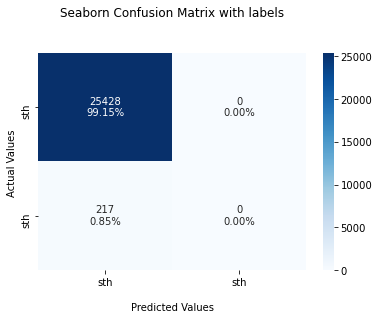

In [338]:
### Source: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

#Generate the confusion matrix

cf_matrix = confusion_matrix(y, np.round(gb_predictions_7244[:,1]))

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

# Plot correlation Matrix
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['sth','sth'])
ax.yaxis.set_ticklabels(['sth','sth'])



## Display the visualization of the Confusion Matrix.
plt.show()

In [339]:
fpr, tpr, thresholds = roc_curve(y,  gb.predict_proba(X)[:,1])

#Plot ROC AUC Curve 
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [340]:
# run this code if you have error loading the scikitplot module
#!pip install scikit-plot

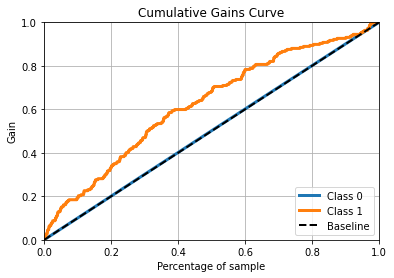

In [341]:
import scikitplot as skplt

fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(y, gb.predict_proba(X) , ax = ax)

plt.show()

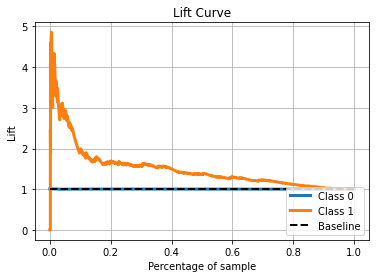

In [342]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(y, gb.predict_proba(X) , ax = ax)

plt.show()

## Prediction on New Campaign